# Tomato Leaf Disease Prediction using Transfer learning

Dataset Link : https://www.kaggle.com/noulam/tomato

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
# This code just limits the gpu usage till 60% ...
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [4]:
# resizing the image
image_size = [224,224]
train_path = 'D:/Data Science/Tensorflow-Laurence Moroney/Tomato Leaf Disease/train'
test_path =  'D:/Data Science/Tensorflow-Laurence Moroney/Tomato Leaf Disease/test'

In [5]:
inception = InceptionV3(input_shape=image_size + [3],
                        include_top=False,
                        weights='imagenet')

In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
# Helpfull for getting the number of output categories
folders = glob('D:/Data Science/Tensorflow-Laurence Moroney/Tomato Leaf Disease/train/*')
len(folders)

10

In [8]:
# our layers that we took from the pretrained model we can then add further more if we want
x = Flatten()(inception.output)
prediction = Dense(len(folders),activation='softmax')(x) # output layer ie...final softmax layer

In [9]:
# Creating a model object
model = Model(inputs=inception.input, outputs = prediction)

In [10]:
model.summary() # Summary of the model 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# compiling the model 
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [12]:
# Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.0,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255.0)


In [13]:
# We Need to keep the target input size as same as we defined earlier when defining the input shape
training_set = train_datagen.flow_from_directory('D:/Data Science/Tensorflow-Laurence Moroney/Tomato Leaf Disease/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/Data Science/Tensorflow-Laurence Moroney/Tomato Leaf Disease/test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [15]:
len(training_set) , len(test_set)

(574, 144)

In [18]:
# fitting the model
hist = model.fit_generator(training_set,
                          validation_data=test_set,
                          epochs =10,
                          steps_per_epoch=len(training_set),
                          validation_steps=len(test_set)) # steps_per_epoch=len(training_set) validation_steps=len(test_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 574 steps, validate for 144 steps
Epoch 1/10
574/574 [==============================] - 474s 825ms/step - loss: 1.9358 - accuracy: 0.6914 - val_loss: 6.3034 - val_accuracy: 0.4659
Epoch 2/10
574/574 [==============================] - 187s 327ms/step - loss: 1.8344 - accuracy: 0.7653 - val_loss: 10.1096 - val_accuracy: 0.4408
Epoch 3/10
574/574 [==============================] - 185s 322ms/step - loss: 1.9334 - accuracy: 0.7901 - val_loss: 15.0463 - val_accuracy: 0.3963
Epoch 4/10
574/574 [==============================] - 186s 325ms/step - loss: 1.9304 - accuracy: 0.8065 - val_loss: 9.6140 - val_accuracy: 0.4977
Epoch 5/10
574/574 [==============================] - 186s 325ms/step - loss: 1.7886 - accuracy: 0.8254 - val_loss: 8.6942 - val_accuracy: 0.5337
Epoch 6/10
574/574 [==============================] - 186s 325ms/step - loss: 1.9751 - accuracy: 0.8261 - val_loss: 13.8071 - val_accuracy: 0.4792
Epoch 7/10
574/574 [=======

In [19]:
from tensorflow.keras.models import load_model
model.save('model_inception_v1.h5')

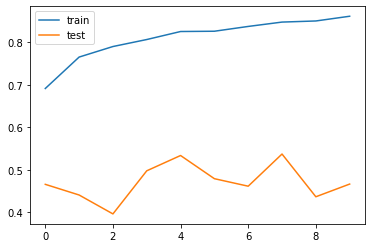

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])

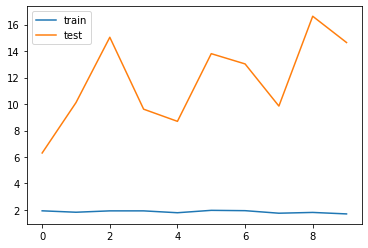

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])